<a href="https://www.kaggle.com/code/diogoalves02/notebook970757ac01?scriptVersionId=135081970" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Carregar o conjunto de dados completo
data, target = fetch_california_housing(return_X_y=True, as_frame=True)

scaler = StandardScaler()
data = scaler.fit_transform(data)

data_small = data[:500]
target_small = target[:500]


Parâmetros: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Score médio: 0.4504930412803798

Parâmetros: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Score médio: 0.5257955476614415

Parâmetros: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Score médio: 0.5527153089182619

Parâmetros: {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
Score médio: 0.4504930412803798

Parâmetros: {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Score médio: 0.522454417562441

Parâmetros: {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Score médio: 0.5509658105690439

Parâmetros: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Score médio: 0.4504930412803798

Parâmetros: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Score médio: 0.5265310751624158

Parâmetros: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Score médio: 0.5527153089182619

Parâmetros: {'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}
Sc

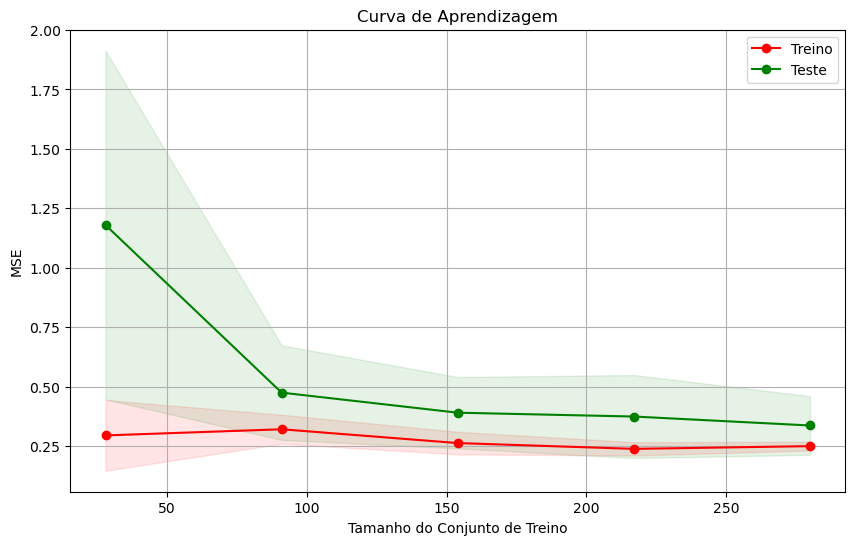

In [2]:
# Divisão dos dados de treino e teste (70-30)
X_train, X_test, y_train, y_test = train_test_split(data_small, target_small, test_size=0.3, random_state=42)

# Definir os parâmetros a serem explorados
param_grid = {
    'C': [1,100,200],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2,3],
    'gamma': ['scale', 'auto']
}

# Criar uma instância do modelo SVR
svr = SVR()

# Realizar a pesquisa pelos melhores hiperparâmetros usando validação cruzada
grid_search = GridSearchCV(svr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obter os resultados de validação cruzada para cada combinação de parâmetros
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print("\nParâmetros:", params)
    print("Score médio:", mean_score)
    

print("---------------------------------------------------------")

best_model = grid_search.best_estimator_

# Previsões nos conjuntos de treinamento e teste
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)


# Cálculo do coeficiente de determinação (R²) e erro médio quadrático nos conjuntos de treino e teste
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("\nParâmetros do melhor modelo:", grid_search.best_params_)
print(f'R² do conjunto de teste: {r2_test}  Erro médio quadrático: {test_mse}')
print(f'R² do conjunto de treino: {r2_train}  Erro médio quadrático: {train_mse}')
print()

# Criar a curva de aprendizagem
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcular a média e o desvio padrão dos scores de treino e teste
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar a curva de aprendizagem
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizagem")
plt.xlabel("Tamanho do Conjunto de Treino")
plt.ylabel("MSE")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treino")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Teste")

plt.legend(loc="best")
plt.show()

'n_estimators': 5, 'max_samples': 0.5, 'max_features': 0.5
R² do conjunto de teste: 0.785084191411314
Erro médio quadrático do conjunto de teste: 0.23699612133689216

'n_estimators': 5, 'max_samples': 0.5, 'max_features': 0.7
R² do conjunto de teste: 0.8106538250149862
Erro médio quadrático do conjunto de teste: 0.20879947992707643

'n_estimators': 5, 'max_samples': 0.5, 'max_features': 1.0
R² do conjunto de teste: 0.8007450113835524
Erro médio quadrático do conjunto de teste: 0.2197263187348921

'n_estimators': 5, 'max_samples': 0.7, 'max_features': 0.5
R² do conjunto de teste: 0.7219166225453281
Erro médio quadrático do conjunto de teste: 0.3066534858361726

'n_estimators': 5, 'max_samples': 0.7, 'max_features': 0.7
R² do conjunto de teste: 0.5824607473853416
Erro médio quadrático do conjunto de teste: 0.4604369684361518

'n_estimators': 5, 'max_samples': 0.7, 'max_features': 1.0
R² do conjunto de teste: 0.831108206645633
Erro médio quadrático do conjunto de teste: 0.1862436282070877

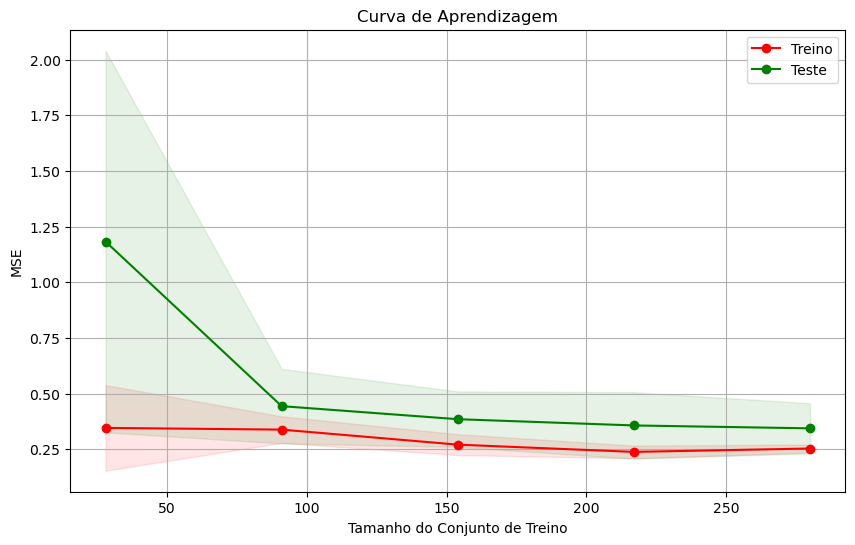

In [3]:
# Explorar diferentes valores para os argumentos do BaggingRegressor
n_estimators_values = [5, 10, 20, 100]
max_samples_values = [0.5, 0.7, 1.0]
max_features_values = [0.5, 0.7, 1.0]

best_score = -float('inf')  # Valor inicial para comparar com os scores encontrados

for n_estimators in n_estimators_values:
    for max_samples in max_samples_values:
        for max_features in max_features_values:
            # Criar uma instância do BaggingRegressor
            bagging_model = BaggingRegressor(estimator=best_model, n_estimators=n_estimators, max_samples=max_samples, max_features=max_features)

            # Treinar o modelo de BaggingRegressor
            bagging_model.fit(X_train, y_train)

            # Avaliar o desempenho do modelo no conjunto de teste
            test_predictions = bagging_model.predict(X_test)
            test_mse = mean_squared_error(y_test, test_predictions)
            r2_test = r2_score(y_test, test_predictions)

            print(f"'n_estimators': {n_estimators}, 'max_samples': {max_samples}, 'max_features': {max_features}")
            print(f"R² do conjunto de teste: {r2_test}")
            print(f"Erro médio quadrático do conjunto de teste: {test_mse}\n")

            # Verificar se o score atual é melhor que o melhor score anterior
            if r2_test > best_score:
                best_score = r2_test
                best_mse = test_mse
                best_n_estimators = n_estimators
                best_max_samples = max_samples
                best_max_features = max_features

print(f"Parâmetros do melhor modelo: 'n_estimators': {best_n_estimators}, 'max_samples': {best_max_samples}, 'max_features': {best_max_features}")
print(f"R² do melhor modelo: {best_score}  MSE: {best_mse}")

# Criar a curva de aprendizagem
train_sizes, train_scores, test_scores = learning_curve(bagging_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcular a média e o desvio padrão dos scores de treino e teste
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar a curva de aprendizagem
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizagem")
plt.xlabel("Tamanho do Conjunto de Treino")
plt.ylabel("MSE")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treino")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Teste")

plt.legend(loc="best")
plt.show()

'n_estimators': 5, 'max_features': sqrt, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True
R² do conjunto de teste: 0.7914627715649936
Erro médio quadrático do conjunto de teste: 0.22996220993695562

'n_estimators': 5, 'max_features': sqrt, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'max_depth': 10, 'bootstrap': True
R² do conjunto de teste: 0.7891396471670307
Erro médio quadrático do conjunto de teste: 0.2325240106500618

'n_estimators': 5, 'max_features': sqrt, 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'max_depth': 10, 'bootstrap': True
R² do conjunto de teste: 0.7118919438078234
Erro médio quadrático do conjunto de teste: 0.31770809365696784

'n_estimators': 5, 'max_features': sqrt, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False
R² do conjunto de teste: 0.8392028465308059
Erro médio quadrático do conjunto de teste: 0.17731735019616493

'n_estimators': 5, 'max_features': sqrt, 'max_leaf_nodes': None, 'min_s

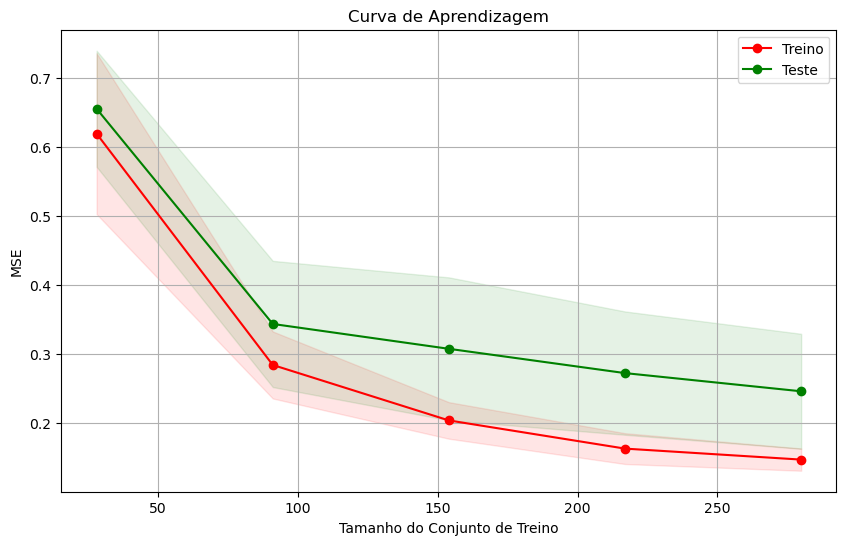

In [4]:
# Explorar diferentes valores para os argumentos do RandomForestRegressor
n_estimators_values = [5, 100, 200, 300]
max_features_values = ['sqrt', 'log2']
max_leaf_nodes_values = [None, 10, 100]
min_samples_leaf_values = [1, 5, 10]
max_depth_values = [10,50,80]
bootstrap_values = [True, False]

best_score = -float('inf')  # Valor inicial para comparar com os scores encontrados

for n_estimators in n_estimators_values:
    for max_features in max_features_values:
        for max_leaf_nodes in max_leaf_nodes_values:
          for max_depth in max_depth_values:
            for bootstrap in bootstrap_values:
              for min_samples_leaf in min_samples_leaf_values:
                  # Criar uma instância do RandomForestRegressor
                  rf_model = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features,
                                                  max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf, max_depth = max_depth, bootstrap = bootstrap)

                  # Treinar o modelo de RandomForestRegressor
                  rf_model.fit(X_train, y_train)

                  # Avaliar o desempenho do modelo no conjunto de teste
                  test_predictions = rf_model.predict(X_test)
                  r2_test = r2_score(y_test, test_predictions)
                  test_mse = mean_squared_error(y_test, test_predictions)

                  print(f"'n_estimators': {n_estimators}, 'max_features': {max_features}, 'max_leaf_nodes': {max_leaf_nodes}, 'min_samples_leaf': {min_samples_leaf}, 'max_depth': {max_depth}, 'bootstrap': {bootstrap}")
                  print(f"R² do conjunto de teste: {r2_test}")
                  print(f"Erro médio quadrático do conjunto de teste: {test_mse}\n")

                  # Verificar se o score atual é melhor que o melhor score anterior
                  if r2_test > best_score:
                      best_score = r2_test
                      best_mse = test_mse
                      best_n_estimators = n_estimators
                      best_max_features = max_features
                      best_max_leaf_nodes = max_leaf_nodes
                      best_min_samples_leaf = min_samples_leaf
                      best_max_depth = max_depth
                      best_bootstrap = bootstrap

print(f"Parâmetros do melhor modelo: 'n_estimators': {best_n_estimators}, 'max_features': {best_max_features}, 'max_leaf_nodes': {best_max_leaf_nodes}, 'min_samples_leaf': {best_min_samples_leaf}, 'max_depth': {best_max_depth}, 'bootstrap': {best_bootstrap}")
print(f"R² do melhor modelo: {best_score} MSE: {best_mse}")

# Criar a curva de aprendizagem
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcular a média e o desvio padrão dos scores de treino e teste
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotar a curva de aprendizagem
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizagem")
plt.xlabel("Tamanho do Conjunto de Treino")
plt.ylabel("MSE")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treino")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Teste")

plt.legend(loc="best")
plt.show()
